## .**PROBLEM STATEMENT**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market

### **Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market

## **DATA UNDERSTANDING**

Variable information
symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (Categorical)

carname: Name of car make and model. (Categorical)

fueltype: Car fuel type i.e. gas or diesel. (Categorical)

aspiration: Aspiration used in a car. Mode of air intake for the internal combustion engine i.e. natural (standard) or turbocharger. (Categorical)

doornumber: Number of doors in a car i.e. two or four. (Categorical)

carbody: Body of car i.e. convertible or hardtop or hatchback or sedan or wagon. (Categorical)

drivewheel: Type of drive wheel. The wheel connected to the motor/engine transmission, which causes the vehicle to move i.e. Front-wheel drive or Rear-wheel drive or Four-wheel drive. (Categorical)

enginelocation: Location of car engine i.e. front or rear. (Categorical)

wheelbase: Length of wheelbase of car. Wheelbase is the distance between centers of front and rear wheels. (Numeric)

carlength: Length of car. (Numeric)

carwidth: Width of car. (Numeric)

carheight: Height of car. (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine i.e. I, ohc, ohcf, ohcv, dohc, dohcv, rotor. (Categorical)

cylindernumber: Number of cylidners used inside the engine i.e. two - twelve. (Categorical)

enginesize: Engine size, or the engine displacement in the car. Engine displacement is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre to bottom dead centre. (Numeric)

fuelsystem: Fuel system used in the car i.e. 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. Fuel-system provided fuel-air mixture to the engine. (Categorical)

boreratio: Bore ratio of car. It is the ratio between cylinder bore diameter and piston stroke. (Numeric)

stroke: Stroke or volume inside the engine. It is the distance travelled by the piston in each cycle. (Numeric)

compressionratio: Compression ratio of car. It is the ratio of the maximum to minimum volume in the cylinder of an internal combustion engine. (Numeric)

horsepower: Horsepower of the engine. The power an engine produces is called horsepower. In mathematical terms, one horsepower is the power needed to move 550 pounds one foot in one second. (Numeric)

peakrpm: RPM at which engine delivers peak horsepower. (Numeric)

citympg: Mileage in city. (Numeric)

highwaympg: Mileage on highway. (Numeric)



In [0]:
####    ### LOADING OUR LIBRARY##
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [0]:
### reading our data into CSV file

data=pd.read_csv('car.csv')

In [0]:
### have a look at our data###
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [0]:
### preview the info in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [0]:
#the description of our data
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## ** DATA CLEANING**


Since we are fitting a linear regression model we need to clean the data we need to remove missing data and deal with outliers.

In [0]:
##looking for mising values
data.isnull().sum()
## our data have missing values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [0]:
## looking for duplicates
data.duplicated()
#data have no duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [0]:
# extracting make from the values
data["make"] = data['CarName'].str.split(' ', expand=True)[0]
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [0]:
#making correction in spelling
data['make']=data['make'].replace({'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','saab':'subaru','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

# **EXPLORATORY DATA ANALYSIS**

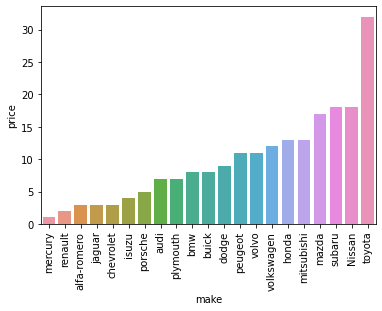

In [0]:
####
#visualizing the make by price
ma=data[['make','price']].groupby(['make']).count().sort_values(by='price',ascending=1)
ma['make']=ma.index
chart=sns.barplot(x='make',y='price',data=ma)
for t in chart.get_xticklabels():
  t.set_rotation(90)

Toyota is the most popular brand ,then nissan and Subaru.
Mercury and Renault are the least popular car brands

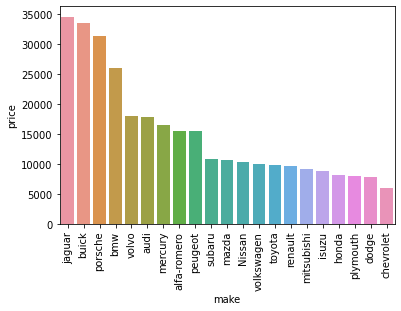

In [0]:
##3 average price by make
ave=data[['make','price']].groupby(['make']).mean().sort_values(by='price',ascending=0)
ave['make']=ave.index
char=sns.barplot(x='make',y='price',data=ave)
for x in char.get_xticklabels():
  x.set_rotation(90)

Jaguar,Brick and porsche are the most expensive cars and Chevrolet and dodge are the cheapest cars

                    price
carbody                  
hardtop      22208.500000
convertible  21890.500000
sedan        14344.270833
wagon        12371.960000
hatchback    10376.652386


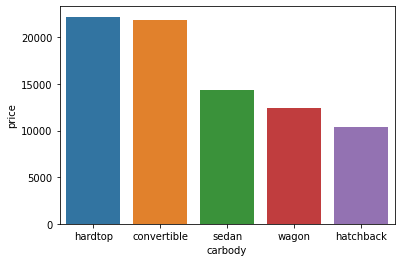

In [0]:
##price for different car with different car body
body=data[['carbody','price']].groupby(['carbody']).mean().sort_values(by='price',ascending=0)
print(body)
body['carbody']=body.index
sns.barplot(x='carbody',y='price',data=body)



cars that have a hardtop body type are the most expensive followed by convertables..
hatchbacks are the cheapest

             price
carbody           
sedan           96
hatchback       70
wagon           25
hardtop          8
convertible      6


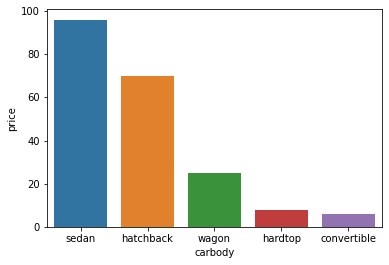

In [0]:
### most popular car body.
pop=data[['carbody','price']].groupby(['carbody']).count().sort_values(by='price',ascending=0)
print(pop)
pop['carbody']=pop.index
sns.barplot(x='carbody',y='price',data=pop)


Sedan are the most popular type of car body and few people prefferd convertible cars

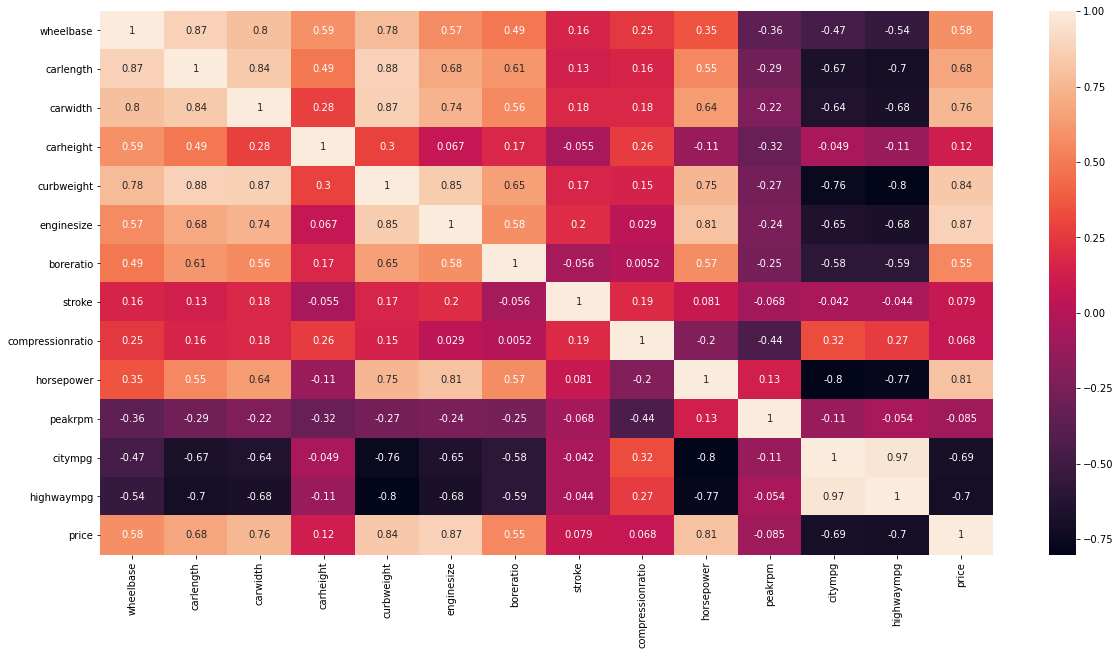

In [0]:
## correlation of varibles
## visualizing the correlation
cor=data[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
plt.figure(figsize=(20,10))
sns.heatmap(cor.corr(),annot=True)
plt.show()

Our main focus is price, and we want to see what affect the price most. 
Horsepower,curbweight,enginesize,carwidth and length have very high positive correlation..As they increase the price of  the car increases. The higher the  enginesize or horsepower the higher the price of the car. The wider or longer the car the higher the price.

We also notice Strong negative  correlation, between price and Highway mpg and citympg, increase in both mpg leads to decrease in price. a car with high mpg is cheaper than car with less mpg

# **DATA PREPARATION**

Preparing our data for modeling.

In [0]:
## assigning our variables into attributes and labels 
x=data[['carheight','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
y=data['price']

In [0]:
### spliting our data into train and test
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=0)

# **MODELING**

Fitting a multiple linear regression.

In [0]:
#### fitting our model####
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#### making prediction from our model
y_pred=regressor.predict(x_test)

In [0]:
### showing our prediction and actual figures
df=pd.DataFrame({'actual':y_test,'predict':y_pred})
df.sample(10)

,actual,predict
96,7499.0,7842.030609
24,6229.0,7585.582121
67,25552.0,23795.368971
178,16558.0,20653.114892
162,9258.0,5950.460415
139,7053.0,6339.632438
198,18420.0,14108.238743
165,9298.0,14084.960996
180,15690.0,22297.446648
86,8189.0,9837.026438


In [0]:
## evaluation of our model
## we use root mean square
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(data['price'].mean())

Root Mean Squared Error: 3989.4091573749997
13276.710570731706
